In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 1.,  1.,  4.,  8.,  8.,  7.,  9.,  5.,  4.,  3.]),
 array([ 2.55451626,  2.99823424,  3.44195222,  3.8856702 ,  4.32938818,
         4.77310616,  5.21682414,  5.66054212,  6.1042601 ,  6.54797808,
         6.99169606]),
 <a list of 10 Patch objects>)

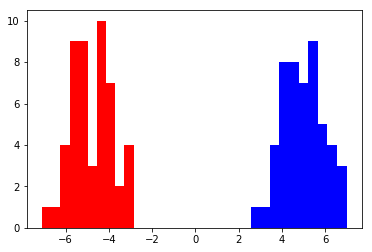

In [2]:
#1
u = np.random.randn(100)
u[:50] = u[:50]-5
u[50:] = u[50:]+5

v = np.zeros(100)
v[:50] = v[:50]-1
v[50:] = v[50:]+1

plt.hist(u[:50],color='r')
plt.hist(u[50:],color='b')

In [3]:
#2
def calc_v(u,w,gam):
    if w*u - gam < 0:
        return -1
    else:
        return 1
    
e = 0.05
gam = 0
w = 0
for k in range(1000):
    for i in range(len(v)):
        w = w + e/2.0*(v[i] - calc_v(u[i],w,gam))*u[i]
        gam = gam - e/2.0*(v[i] - calc_v(u[i],w,gam))

In [4]:
u = np.random.randn(100)
u[:50] = u[:50]-5
u[50:] = u[50:]+5

v = np.zeros(100)
v[:50] = v[:50]-1
v[50:] = v[50:]+1

accuracy = 1.0


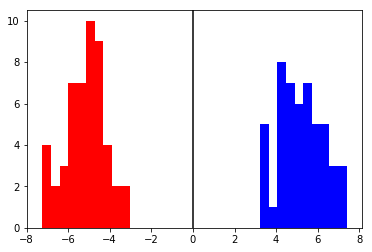

In [5]:
pred = []
for i in range(len(v)):
    pred.append(calc_v(u[i],w,gam))
print 'accuracy =', np.mean(pred==v)
plt.hist(u[:50],color='r')
plt.hist(u[50:],color='b')
plt.axvline(x=gam/w, color='k')

(array([ 1.,  0.,  2.,  5.,  3.,  5.,  5.,  4.,  4.,  1.]),
 array([  8.07373802,   8.45379413,   8.83385024,   9.21390636,
          9.59396247,   9.97401858,  10.35407469,  10.73413081,
         11.11418692,  11.49424303,  11.87429914]),
 <a list of 10 Patch objects>)

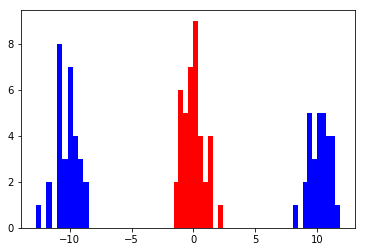

In [6]:
#3
u = np.random.randn(100)
u[:30] = u[:30]- 10
u[70:] = u[70:]+10
plt.hist(u[:30],color='b')
plt.hist(u[30:70],color='r')
plt.hist(u[70:],color='b')

In [7]:
#4
v = np.zeros(100)
v[:30] = v[:30]+1
v[30:70]=v[30:70]-1
v[70:] = v[70:]+1

e = 0.05
gam = 0
w = 0
for k in range(1000):
    for i in range(len(v)):
        #print v[i] - calc_v(u[i],w,gam)
        w = w + e/2.0*(v[i] - calc_v(u[i],w,gam))*u[i]
        gam = gam - e/2.0*(v[i] - calc_v(u[i],w,gam))

accuracy = 0.7


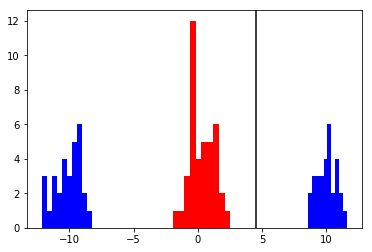

In [8]:
u = np.random.randn(100)
u[:30] = u[:30]- 10
u[70:] = u[70:]+10

pred = []
for i in range(len(v)):
    pred.append(calc_v(u[i],w,gam))
print 'accuracy =', np.mean(pred==v)

plt.hist(u[:30],color='b')
plt.hist(u[30:70],color='r')
plt.hist(u[70:],color='b')
plt.axvline(x=gam/w, color='k')

In [9]:
#5
def f(s,sb):
    return np.exp(-0.5*(s-sb)**2)

sb = np.arange(-10,12,2)
s = 0
w = np.random.randn(11)

print sum(w*f(s,sb))

def h(s):
    return np.sin(s)

def fit(itr):
    w = np.random.randn(11)
    for i in range(itr):
        s_ = np.random.rand(1)*20-10
        v = sum(w*f(s_,sb))
        w = w + 0.05*(h(s_)-v)*f(s_,sb)
    return w

0.378826994378


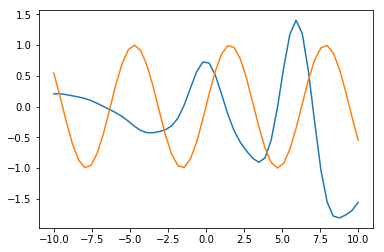

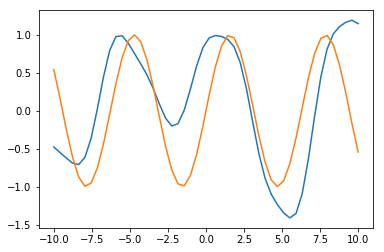

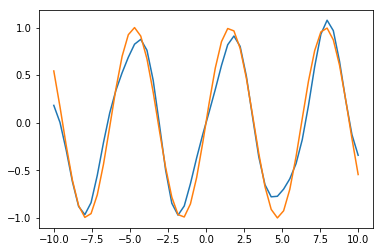

In [12]:
s = np.linspace(-10, 10)

v_list = []
w = fit(10)
for k in s:
    v_list.append(sum(w*f(k,sb)))
plt.plot(s,v_list)
plt.plot(s,h(s))

plt.figure()
v_list = []
w = fit(100)
for k in s:
    v_list.append(sum(w*f(k,sb)))
plt.plot(s,v_list)
plt.plot(s,h(s))

plt.figure()
v_list = []
w = fit(1000)
for k in s:
    v_list.append(sum(w*f(k,sb)))
plt.plot(s,v_list)
plt.plot(s,h(s))